In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

In [2]:
evn = pd.read_csv("Data/yerevan_houses.csv")
evn.head()

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,0,65000.0,good,Center,9,Vardanants St,3,Yerevan,80.0,http://www.myrealty.am/en/item/24032/3-senyaka...,1,panel,4,2.8
1,1,140000.0,newly repaired,Arabkir,10,Hr.Kochar St,4,Yerevan,115.0,http://www.myrealty.am/en/item/17599/4-senyaka...,1,monolit,2,3.0
2,2,97000.0,newly repaired,Center,10,Teryan St,2,Yerevan,72.0,http://www.myrealty.am/en/item/29472/2-senyaka...,1,panel,3,2.8
3,3,47000.0,good,Center,9,D. Demirchyan St,1,Yerevan,43.0,http://www.myrealty.am/en/item/37186/1-senyaka...,1,panel,9,2.8
4,4,51000.0,newly repaired,Center,14,Sayat Nova Ave,1,Yerevan,33.0,http://www.myrealty.am/en/item/37184/1-senyaka...,1,other,4,2.8


#### Get rid of Unnamed:0 column

In [3]:
#evn.drop("Unnamed: 0", axis = 1) or
evn.drop(columns = "Unnamed: 0")

,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,65000.0,good,Center,9,Vardanants St,3,Yerevan,80.0,http://www.myrealty.am/en/item/24032/3-senyaka...,1,panel,4,2.8
1,140000.0,newly repaired,Arabkir,10,Hr.Kochar St,4,Yerevan,115.0,http://www.myrealty.am/en/item/17599/4-senyaka...,1,monolit,2,3.0
2,97000.0,newly repaired,Center,10,Teryan St,2,Yerevan,72.0,http://www.myrealty.am/en/item/29472/2-senyaka...,1,panel,3,2.8
3,47000.0,good,Center,9,D. Demirchyan St,1,Yerevan,43.0,http://www.myrealty.am/en/item/37186/1-senyaka...,1,panel,9,2.8
4,51000.0,newly repaired,Center,14,Sayat Nova Ave,1,Yerevan,33.0,http://www.myrealty.am/en/item/37184/1-senyaka...,1,other,4,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,35000.0,newly repaired,Avan,9,Bryusov dis.,2,Yerevan,46.0,http://www.myrealty.am/en/item/34911/2-senyaka...,1,panel,5,2.8
6230,35000.0,newly repaired,Nor Norq,10,Vaxtangov St,1,Yerevan,33.0,http://www.myrealty.am/en/item/34622/1-senyaka...,1,panel,10,3.0
6231,35000.0,good,Erebuni,9,Erebuni St,2,Yerevan,45.0,http://www.myrealty.am/en/item/34319/2-senyaka...,1,panel,7,2.8
6232,35000.0,newly repaired,Achapnyak,4,Halabyan St,2,Yerevan,60.0,http://www.myrealty.am/en/item/32885/2-senyaka...,1,stone,4,2.8


#### Catch the NaN values and try to handle them. Possible treatments could be:

* dropping the records containing NaN values
* filling the NaN values with something meaningfull

In [5]:
evn.isna().count()

Unnamed: 0        6234
price             6234
condition         6234
district          6234
max_floor         6234
street            6234
num_rooms         6234
region            6234
area              6234
url               6234
num_bathrooms     6234
building_type     6234
floor             6234
ceiling_height    6234
dtype: int64

#### Find out existing correlations with "price" column. Plot the heatmap.

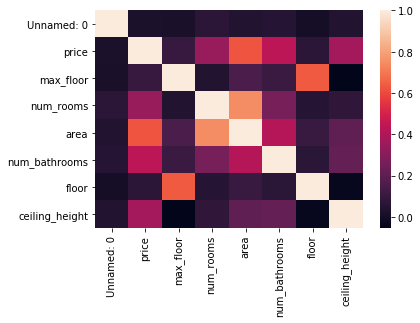

In [118]:
sns.heatmap(evn.corr());

#### Try doing some bivariate analysis for "price" column. <br> For numerical columns you can use jointplot and pairplot, for numerical columns try to make catplots (barplots, countplots, boxplots including).  Use categorical features as hue parameter in pairplots. Include some notes and conclusions you make upon all of these accordingly. For example, do you notice a common pattern between "price" and "district"? Or how does the number of rooms affect on the house price, etc. 

#### Write code which plots distplots of all numeric columns in a loop.

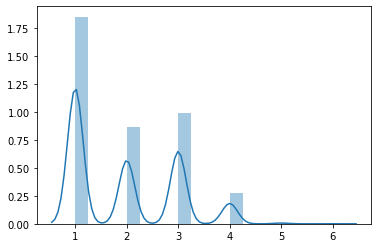

In [120]:
#plt.plot("num_rooms", "num_bathrooms", 'r')
sns.distplot(evn[['num_rooms', 'num_bathrooms']], kde = True, bins = 20);

#### Plot boxplot and barplot couples as subplots for all categorical columns vs "price" in a loop. <br> Use tight layout to avoid overlapping. Use ```fig, axes = plt.subplots(nrows, ncols)``` 

<Figure size 432x288 with 0 Axes>

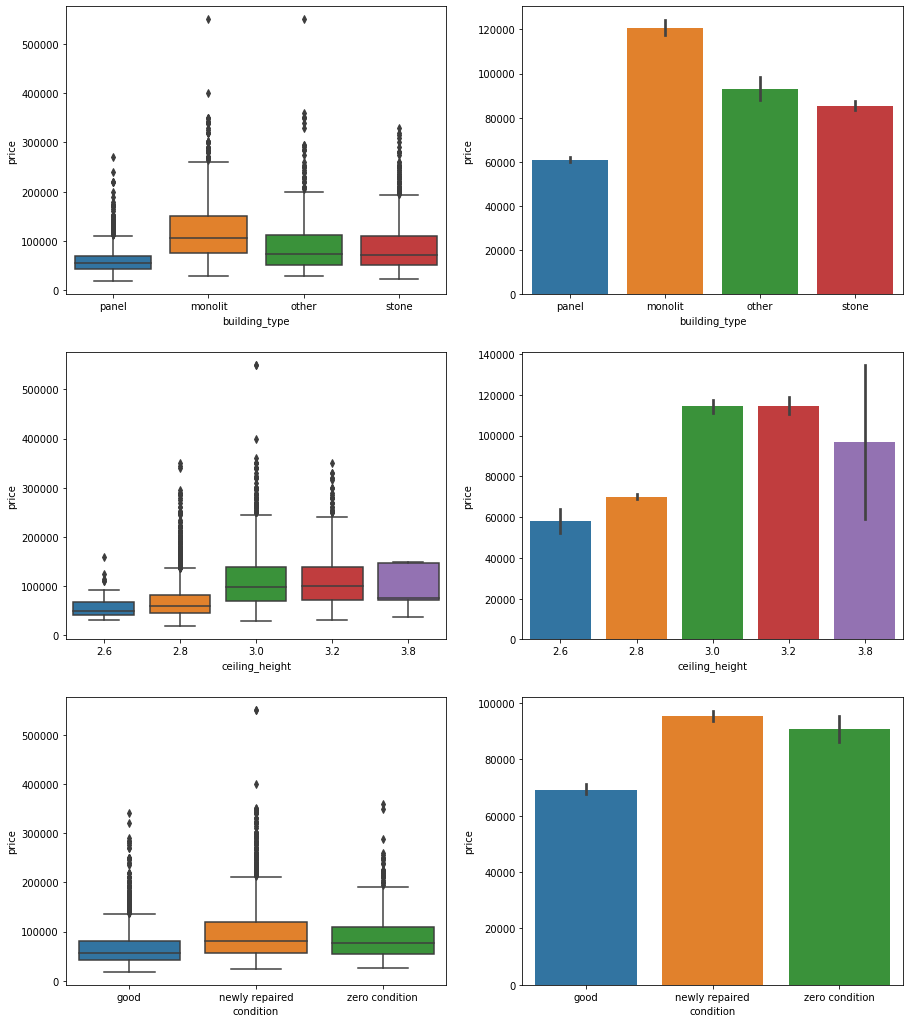

In [38]:
fig = plt.figure()
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 18))

#my_pal = {"panel": "g", "monolit": "b", "other":"m", "stone":"r"}
sns.boxplot(y = evn["price"], x = evn["building_type"], ax = axes[0, 0]);
sns.barplot(y = evn["price"], x = evn["building_type"], ax = axes[0, 1]);

sns.boxplot(y = evn["price"], x = evn["ceiling_height"], ax = axes[1, 0]);
sns.barplot(y = evn["price"], x = evn["ceiling_height"], ax = axes[1, 1]);

sns.boxplot(y = evn["price"], x = evn["condition"], ax = axes[2, 0]);
sns.barplot(y = evn["price"], x = evn["condition"], ax = axes[2, 1]);


#### **Bonus: Try to visualize the street occurencies in this dataframe on map. Just checking googling skills :)

In [41]:
data = dict(type='choropleth',
           locations = evn['district'],
            locationmode = "country names",
           z = evn['ceiling_height'],
           text = evn['district'],
           colorbar = {'title' : 'Yerevan map'},
           )
layout = dict(
    title = 'Yerevan map',
    geo = dict(
        scope = 'asia',
        showframe = False,
        projection = {'type':'natural earth'}
    )
)



In [42]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [44]:
address = "London"

map = gis.map("United Kingdon", 5)
map

london = geocode(address)[0]
map.draw(london['location'])


NameError: name 'gis' is not defined